In [41]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
from Oracle import *
%matplotlib inline

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

In [42]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌──────────┐┌─┐   
q_0: ┤ RY(pi/4) ├┤M├───
     ├──────────┤└╥┘┌─┐
q_1: ┤ RY(pi/4) ├─╫─┤M├
     └──────────┘ ║ └╥┘
c_0: ═════════════╩══╬═
                     ║ 
c_1: ════════════════╩═

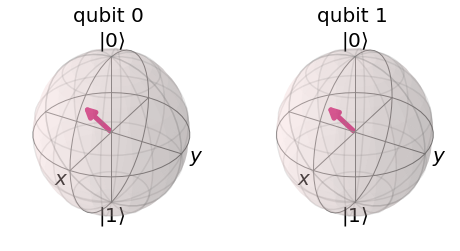

In [43]:
plot_bloch_multivector(orig_statevec)

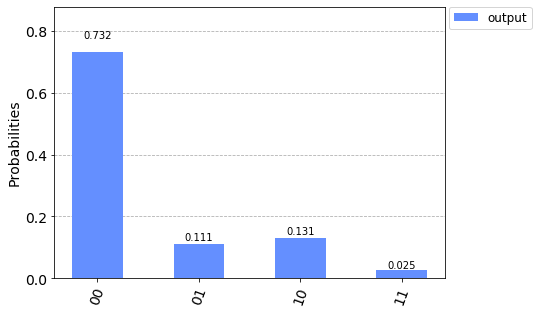

In [44]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

In [45]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌──────────┐┌─┐   
q_0: ┤ H ├┤ RY(pi/4) ├┤M├───
     ├───┤├──────────┤└╥┘┌─┐
q_1: ┤ H ├┤ RY(pi/4) ├─╫─┤M├
     └───┘└──────────┘ ║ └╥┘
c_0: ══════════════════╩══╬═
                          ║ 
c_1: ═════════════════════╩═

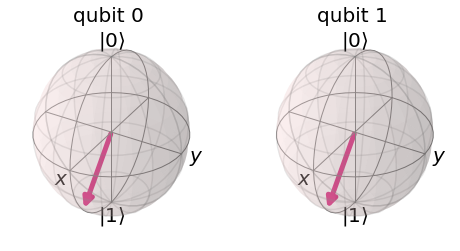

In [46]:
plot_bloch_multivector(statevec)

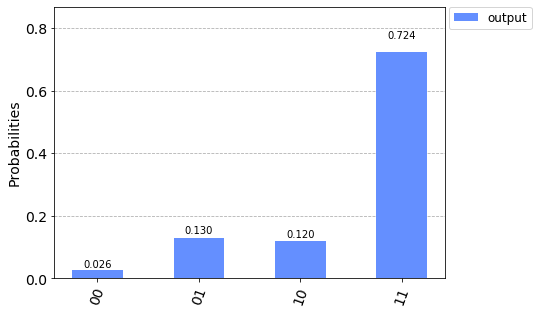

In [47]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

In [48]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌──────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ RY(pi/4) ├┤ H ├┤M├───
     ├───┤├──────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ RY(pi/4) ├┤ H ├─╫─┤M├
     └───┘└──────────┘└───┘ ║ └╥┘
c_0: ═══════════════════════╩══╬═
                               ║ 
c_1: ══════════════════════════╩═

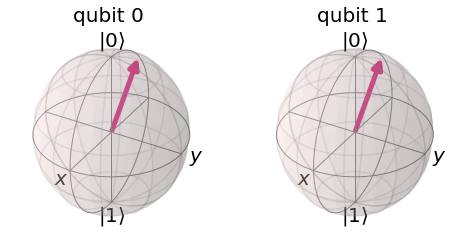

In [49]:
plot_bloch_multivector(statevec)

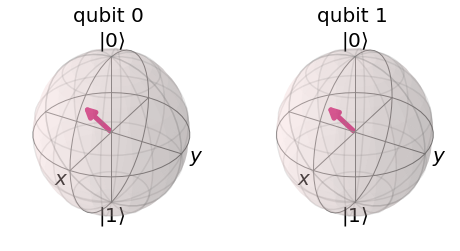

In [50]:
plot_bloch_multivector(orig_statevec)

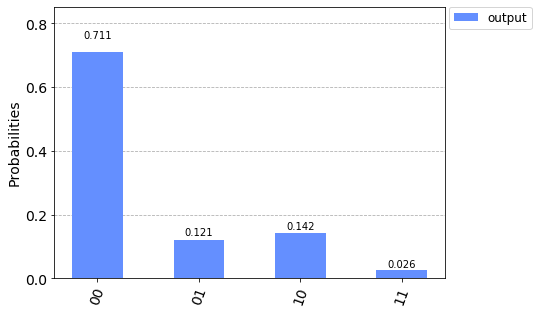

In [51]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

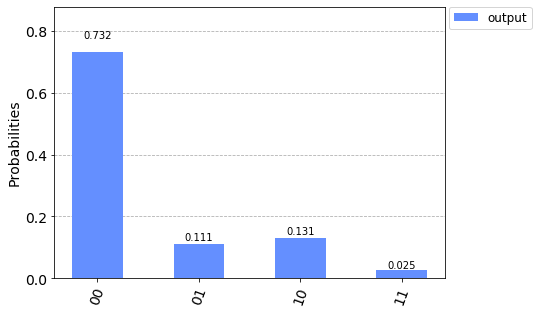

In [52]:
plot_histogram([orig_counts], legend=['output'])

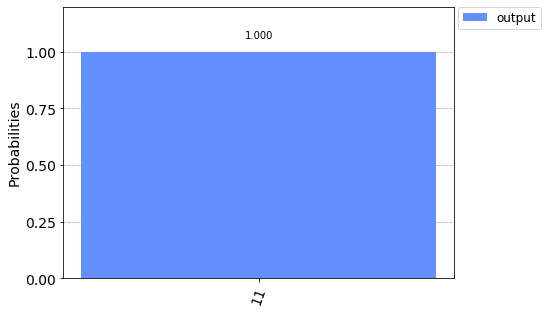

In [53]:
c = q.QuantumCircuit(2,2)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

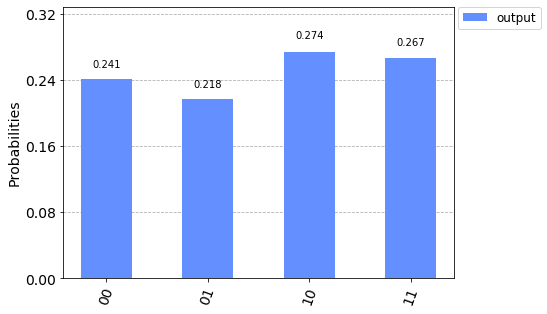

In [54]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

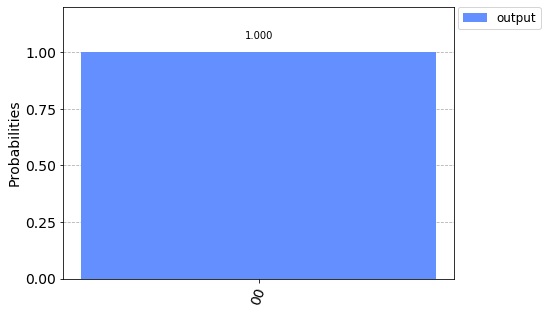

In [55]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

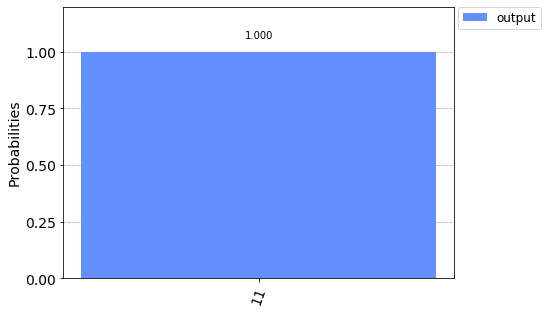

In [56]:
plot_histogram([orig_counts], legend=['output'])

In [57]:
def balanced_black_box(c):
    c.append(oracle1_inst, [0, 1, 2])
    return c
    
def constant_black_box(c):
    c.append(oracle2_inst, [0, 1, 2])
    return c

In [58]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw()

┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤1 oracle1 ├
     │          │
q_2: ┤2         ├
     └──────────┘
c_0: ════════════
                 
c_1: ════════════

In [59]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c)
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()

┌───┐┌──────────┐┌───┐
q_0: ┤ H ├┤0         ├┤ H ├
     ├───┤│          │├───┤
q_1: ┤ H ├┤1 oracle1 ├┤ H ├
     ├───┤│          │└───┘
q_2: ┤ H ├┤2         ├─────
     └───┘└──────────┘     
c_0: ══════════════════════
                           
c_1: ══════════════════════

In [60]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()

┌───┐ ░ ┌──────────┐ ░ ┌───┐
q_0: ┤ H ├─░─┤0         ├─░─┤ H ├
     ├───┤ ░ │          │ ░ ├───┤
q_1: ┤ H ├─░─┤1 oracle1 ├─░─┤ H ├
     ├───┤ ░ │          │ ░ └───┘
q_2: ┤ H ├─░─┤2         ├─░──────
     └───┘ ░ └──────────┘ ░      
c_0: ════════════════════════════
                                 
c_1: ════════════════════════════

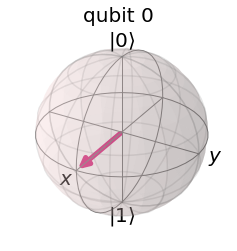

In [61]:
c = q.QuantumCircuit(1,1)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

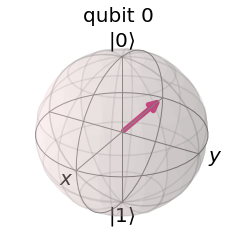

In [62]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

In [63]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()

░ ┌───┐ ░ ┌──────────┐ ░ ┌───┐
q_0: ──────░─┤ H ├─░─┤0         ├─░─┤ H ├
           ░ ├───┤ ░ │          │ ░ ├───┤
q_1: ──────░─┤ H ├─░─┤1 oracle1 ├─░─┤ H ├
     ┌───┐ ░ ├───┤ ░ │          │ ░ └───┘
q_2: ┤ X ├─░─┤ H ├─░─┤2         ├─░──────
     └───┘ ░ └───┘ ░ └──────────┘ ░      
c_0: ════════════════════════════════════
                                         
c_1: ════════════════════════════════════

In [64]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()

░ ┌───┐ ░ ┌──────────┐ ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░─┤0         ├─░─┤ H ├┤M├───
           ░ ├───┤ ░ │          │ ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░─┤1 oracle1 ├─░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░ │          │ ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░─┤2         ├─░───────╫──╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░       ║  ║ 
c_0: ═════════════════════════════════════╩══╬═
                                             ║ 
c_1: ════════════════════════════════════════╩═

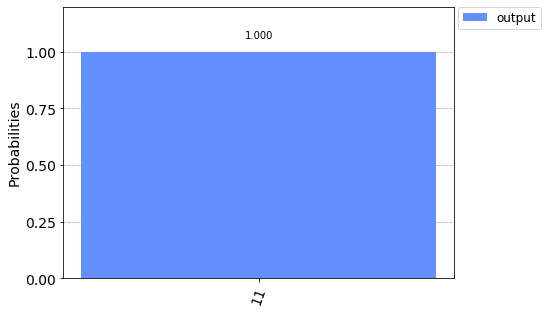

In [65]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

In [66]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)  # changed to constant box.
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
c.draw()

░ ┌───┐ ░ ┌──────────┐ ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░─┤0         ├─░─┤ H ├┤M├───
           ░ ├───┤ ░ │          │ ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░─┤1 oracle2 ├─░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░ │          │ ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░─┤2         ├─░───────╫──╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░       ║  ║ 
c_0: ═════════════════════════════════════╩══╬═
                                             ║ 
c_1: ════════════════════════════════════════╩═

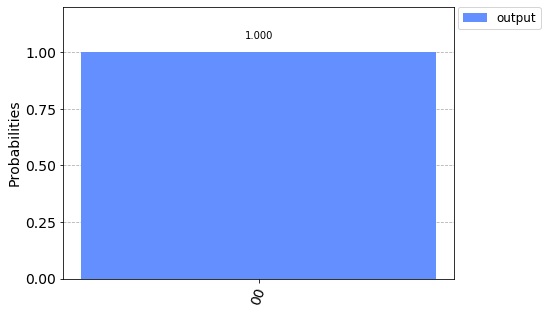

In [67]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

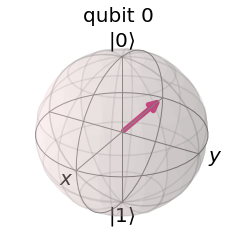

In [68]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

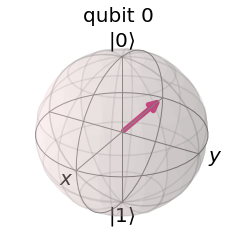

In [69]:
c = q.QuantumCircuit(1,1)
c.ry(math.pi,0)
c.h(0)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

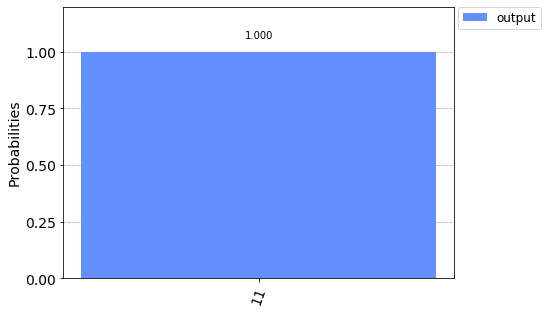

In [70]:
c = q.QuantumCircuit(3,2)

c.barrier()
c.ry(math.pi,2)  # changed c.x(2) to this.
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

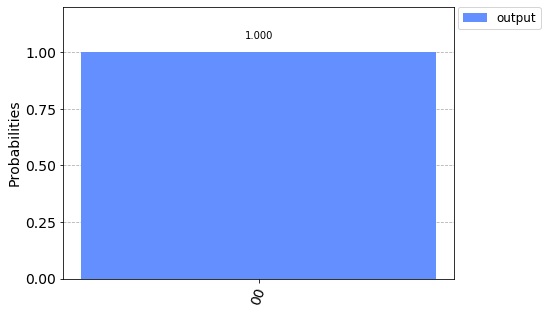

In [71]:
c = q.QuantumCircuit(3,2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

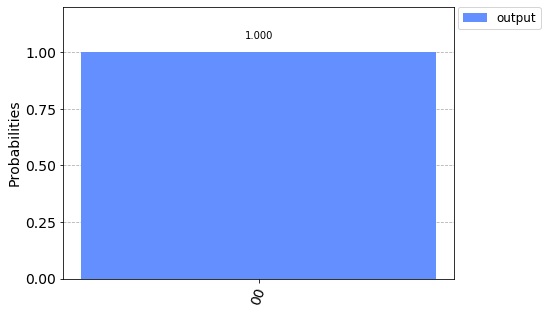

In [72]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.x(2)  # moving the not gate here
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

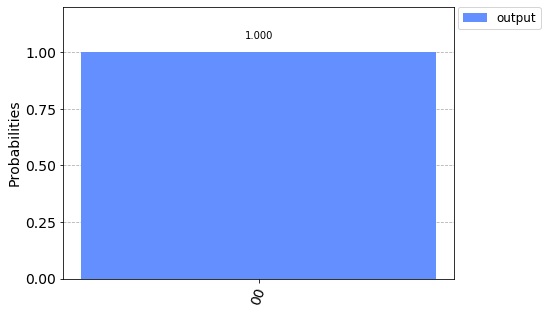

In [73]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.x(2)  # moved the not gate here
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

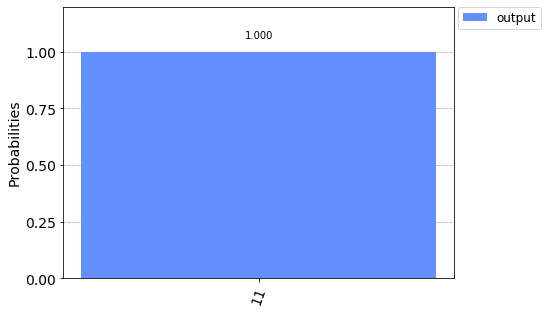

In [74]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

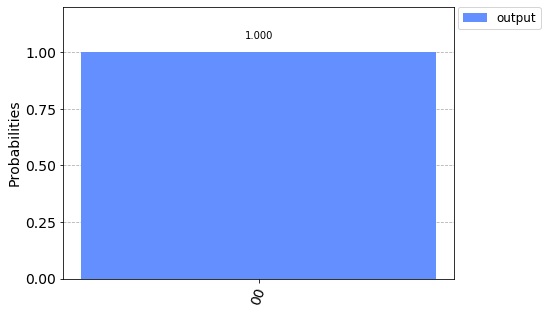

In [36]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])